# Imports

In [33]:
import pandas as pd
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import cv2
import glob
from IPython.display import clear_output, display

# Get dataset

In [12]:
dataset_dir = "/home/sara/Desktop/Master-thesis/master_thesis/Dataset/"

df = pd.read_csv(f'{dataset_dir}Original_format/train_ship_segmentations_v2.csv')
df.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


# Convert stuff

## Make target dir

In [42]:
directory = "yolo"
path_yolo = os.path.join(dataset_dir, directory)
try:
    os.mkdir(path_yolo)
    print("Directory '% s' created" % directory)
except:
    print("Directory '% s' is already created" % directory)
directory = "yolo_test"
path_yolo_test = os.path.join(dataset_dir, directory)
try:
    os.mkdir(path_yolo_test)
    print("Directory '% s' created" % directory)
except:
    print("Directory '% s' is already created" % directory)

Directory 'yolo' is already created
Directory 'yolo_test' is already created


## Functions

In [14]:
def calculate_mask(line):
    if not pd.isna(line):
        # Create mask
        mask = np.zeros(pixels, dtype="uint8")
        line = line.split(" ")
        pair = []
        for value in line:
            pair.append(int(value))
            if len(pair) == 2:
                start = pair[0]
                end = start + pair[1]
                mask[start:end] = 1
                pair = []
        mask = mask.reshape(h_image,w_image)
        mask = np.rot90(mask, k=1)
        mask = np.flip(mask, axis=0)
        return mask
    return None

In [15]:
def calculate_bounding_box(mask):
    if mask is not None:
        # Create bounding box
        x,y,w,h = cv2.boundingRect(mask)
        centerx = int(x+(w/2))
        centery = int(y+(h/2))
        return f"0 {centerx} {centery} {w} {h}"

    return None

## Get parameters

In [16]:
# Get image size 
img_name = "0a0df8299.jpg"
img_path = os.path.join(dataset_dir, "Original_format/train_v2",img_name)

img = Image.open(img_path)
w_image,h_image = img.size
pixels = w_image*h_image
print(img.size)

(768, 768)


## Tests

In [17]:
# Sample image
img_name = "0a0df8299.jpg"
img_path = os.path.join(dataset_dir, "Original_format/train_v2",img_name)

image = cv2.imread(img_path)

cv2.imshow('img', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
# get masks of image
one = df[df['ImageId'] == "0a0df8299.jpg"]["EncodedPixels"].values[0]
two = df[df['ImageId'] == "0a0df8299.jpg"]["EncodedPixels"].values[1]
three = df[df['ImageId'] == "0a0df8299.jpg"]["EncodedPixels"].values[2]
mask1 = calculate_mask(one)*255
mask2 = calculate_mask(two)*255
mask3 = calculate_mask(three)*255

cv2.imshow("Rectangular Mask", mask3)
cv2.waitKey(0)
cv2.destroyAllWindows()

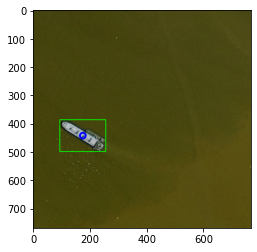

In [19]:
# Get bounding box
conimage = image.copy()
x,y,w,h = cv2.boundingRect(mask3)
centerx = int(x+(w/2))
centery = int(y+(h/2))
cv2.rectangle(conimage,(x,y),(x+w,y+h),(0,255,0),2)
cv2.circle(conimage, (centerx,centery), 10, (0, 0, 255), 5)
plt.imshow(conimage)


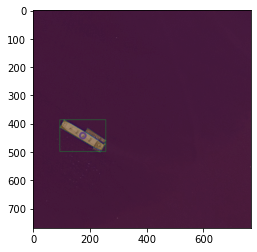

In [22]:
fig, ax = plt.subplots()

ax.imshow(conimage)
ax.imshow(mask1, alpha=0.3)
ax.imshow(mask2, alpha=0.3)
ax.imshow(mask3, alpha=0.3)


## Convert

In [43]:
# Empty yolo dir

files = glob.glob(f"{path_yolo}/*")
for f in files:
    os.remove(f)

# Empty yolo test dir

files = glob.glob(f"{path_yolo_test}/*")
for f in files:
    os.remove(f)

In [40]:
max = df.shape[0]
for index, row in df.iterrows():
    # Check if file exist
    path = os.path.join(dataset_dir, "Original_format/train_v2",row['ImageId'])
    if os.path.isfile(path):
    
        # Create txt
        path = f"{os.path.join(path_yolo, row['ImageId'].strip('.jpg'))}.txt"
        file_object  = open(path, "a")

        # Create mask
        mask = calculate_mask(row["EncodedPixels"])

        # Calculate bounding box
        line = calculate_bounding_box(mask)
        
        if line is not None:
            file_object.write(f"{line} \n")

        file_object.close()

    # Check if file exist
    path = os.path.join(dataset_dir, "Original_format/test_v2",row['ImageId'])
    if os.path.isfile(path):
    
        # Create txt
        path = f"{os.path.join(path_yolo_test, row['ImageId'].strip('.jpg'))}.txt"
        file_object  = open(path, "a")

        # Create mask
        mask = calculate_mask(row["EncodedPixels"])

        # Calculate bounding box
        line = calculate_bounding_box(mask)
        
        if line is not None:
            file_object.write(f"{line} \n")

        file_object.close()

    # Print
    if index % 1000 == 0:
        clear_output()
        display(f"{index}/{max}")
display(f"{max}/{max}")


'231000/231723'